In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("redwine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.shape

(1599, 12)

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


SUMMARY STATISTICS

In [10]:
#Here we check the data statistically
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


exploring data variables

In [11]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Data Visualizations

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

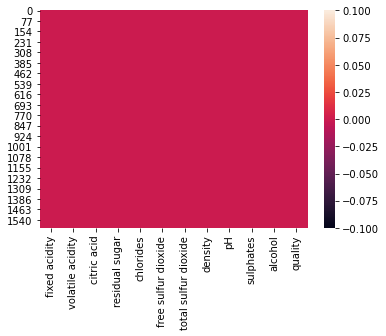

In [14]:
sns.heatmap(df.isnull())

CHECKING CORRELATION

In [15]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

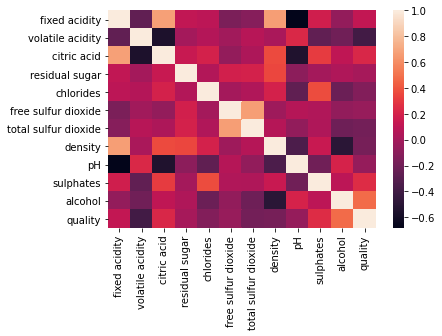

In [16]:
sns.heatmap(dfcor)

<AxesSubplot:>

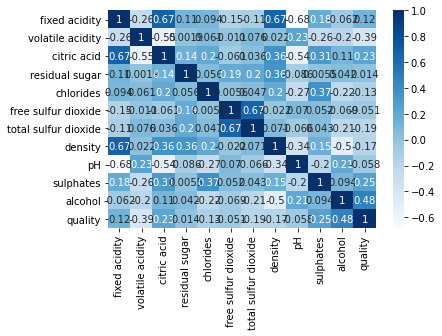

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

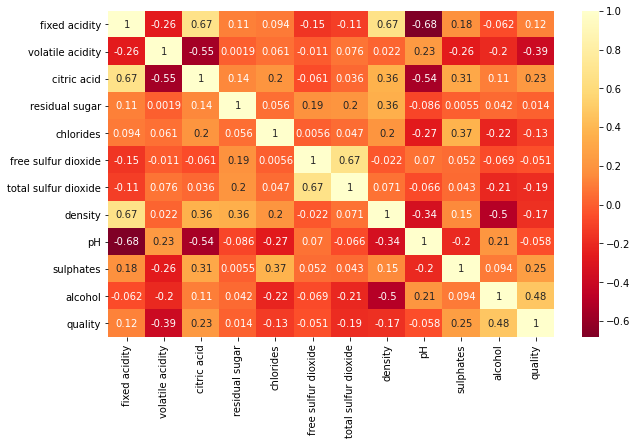

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

PLOTTING OUTLIERS

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

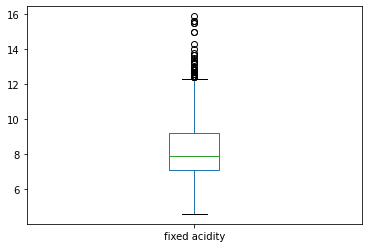

In [20]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

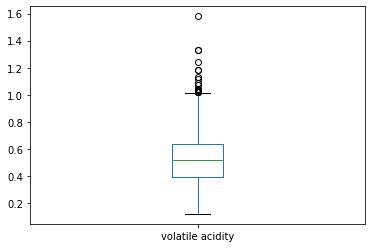

In [21]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

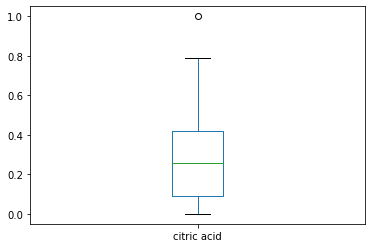

In [22]:
df['citric acid'].plot.box()

<AxesSubplot:>

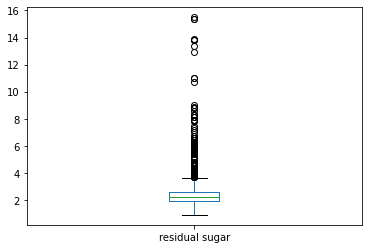

In [23]:
df['residual sugar'].plot.box()

<AxesSubplot:>

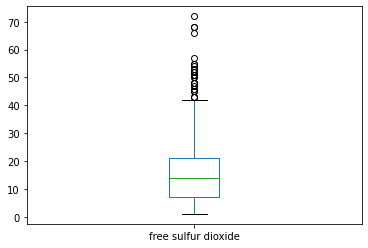

In [24]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

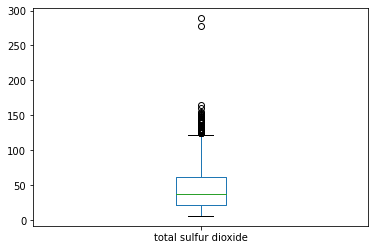

In [25]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

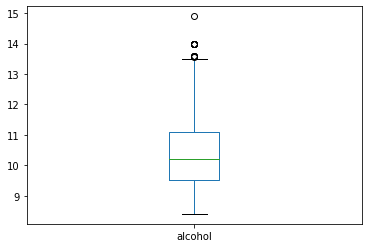

In [26]:
df['alcohol'].plot.box()

<AxesSubplot:>

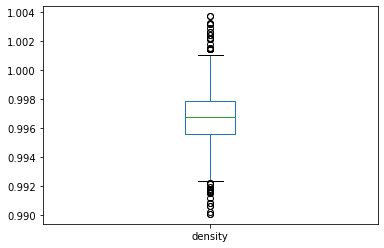

In [27]:
df['density'].plot.box()

CHECKING SKEWNESS

<AxesSubplot:xlabel='density', ylabel='Density'>

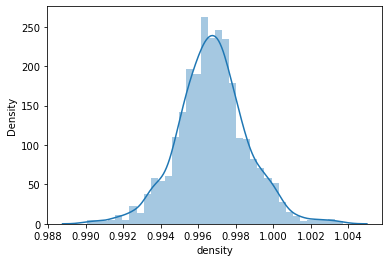

In [28]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

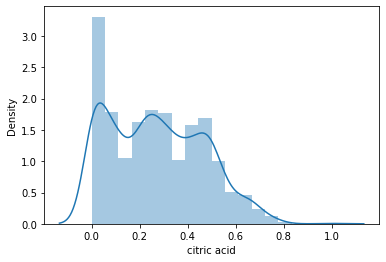

In [29]:
sns.distplot(df['citric acid'])

In [30]:
collist=df.columns.values
ncol=12
nrows=10
collist

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

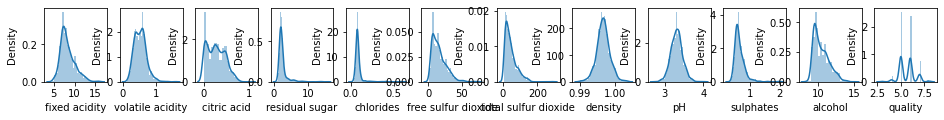

In [31]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

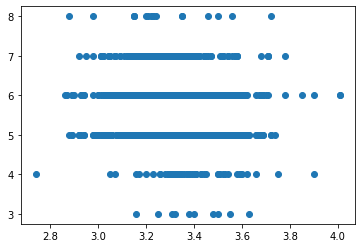

In [32]:
#bivariate analysis
plt.scatter(df['pH'],df['quality'])

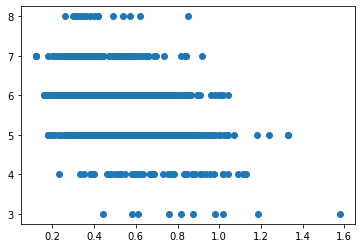

In [33]:
#bivariate analysis
plt.scatter(df['volatile acidity'],df['quality'])

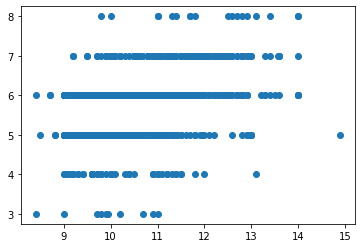

In [34]:
#bivariate analysis
plt.scatter(df['alcohol'],df['quality'])

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
df.shape

(1599, 12)

REMOVING OUTLIERS

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [38]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [39]:

# row and column

z[13][8]

0.3311766102216806

In [40]:

z[15][5]

3.359038194288537

In [41]:
z[1589][2]

0.36446303582288697

In [42]:
z[1574][2]

2.613863765506409

In [43]:
z[1589][2]

0.36446303582288697

In [44]:
z[14][4]

1.881665507905276

In [45]:
df_new=df[(z<3).all(axis=1)]

df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [46]:
df_new.shape

(1451, 12)

TRAINING THE MODEL

In [47]:
x=df.iloc[:, 0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [48]:
y=df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=60)

In [50]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6333333333333333
[[ 5  2  2]
 [ 1 13  4]
 [ 0  2  1]]
              precision    recall  f1-score   support

           5       0.83      0.56      0.67         9
           6       0.76      0.72      0.74        18
           7       0.14      0.33      0.20         3

    accuracy                           0.63        30
   macro avg       0.58      0.54      0.54        30
weighted avg       0.72      0.63      0.67        30



In [51]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7333333333333333
[[ 5  4  0]
 [ 1 17  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           5       0.83      0.56      0.67         9
           6       0.71      0.94      0.81        18
           7       0.00      0.00      0.00         3

    accuracy                           0.73        30
   macro avg       0.51      0.50      0.49        30
weighted avg       0.68      0.73      0.69        30



In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7
[[ 8  1  0  0]
 [ 2 12  4  0]
 [ 0  1  1  1]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

           5       0.80      0.89      0.84         9
           6       0.86      0.67      0.75        18
           7       0.20      0.33      0.25         3
           8       0.00      0.00      0.00         0

    accuracy                           0.70        30
   macro avg       0.46      0.47      0.46        30
weighted avg       0.77      0.70      0.73        30



In [53]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.5333333333333333
[[ 8  1  0]
 [10  8  0]
 [ 1  2  0]]
              precision    recall  f1-score   support

           5       0.42      0.89      0.57         9
           6       0.73      0.44      0.55        18
           7       0.00      0.00      0.00         3

    accuracy                           0.53        30
   macro avg       0.38      0.44      0.37        30
weighted avg       0.56      0.53      0.50        30



In [54]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7333333333333333
[[ 5  4  0]
 [ 1 17  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           5       0.83      0.56      0.67         9
           6       0.71      0.94      0.81        18
           7       0.00      0.00      0.00         3

    accuracy                           0.73        30
   macro avg       0.51      0.50      0.49        30
weighted avg       0.68      0.73      0.69        30



In [55]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7333333333333333
[[ 4  5  0]
 [ 0 18  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           5       1.00      0.44      0.62         9
           6       0.69      1.00      0.82        18
           7       0.00      0.00      0.00         3

    accuracy                           0.73        30
   macro avg       0.56      0.48      0.48        30
weighted avg       0.72      0.73      0.68        30



In [56]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [57]:
svmkernel('rbf')

0.7333333333333333
[[ 5  4  0]
 [ 1 17  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           5       0.83      0.56      0.67         9
           6       0.71      0.94      0.81        18
           7       0.00      0.00      0.00         3

    accuracy                           0.73        30
   macro avg       0.51      0.50      0.49        30
weighted avg       0.68      0.73      0.69        30



In [58]:
svmkernel('poly')

0.7333333333333333
[[ 4  5  0]
 [ 0 18  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           5       1.00      0.44      0.62         9
           6       0.69      1.00      0.82        18
           7       0.00      0.00      0.00         3

    accuracy                           0.73        30
   macro avg       0.56      0.48      0.48        30
weighted avg       0.72      0.73      0.68        30



ENSEMBLE TECHNIQUES

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=45)
#randomforesctclassifier(100)---default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8
[[ 9  0  0]
 [ 4 13  1]
 [ 0  1  2]]
              precision    recall  f1-score   support

           5       0.69      1.00      0.82         9
           6       0.93      0.72      0.81        18
           7       0.67      0.67      0.67         3

    accuracy                           0.80        30
   macro avg       0.76      0.80      0.77        30
weighted avg       0.83      0.80      0.80        30



In [60]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=45)
#randomforesctclassifier(100)---default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.5333333333333333
[[9 0 0 0]
 [9 6 3 0]
 [0 1 1 1]
 [0 0 0 0]]
              precision    recall  f1-score   support

           5       0.50      1.00      0.67         9
           6       0.86      0.33      0.48        18
           7       0.25      0.33      0.29         3
           8       0.00      0.00      0.00         0

    accuracy                           0.53        30
   macro avg       0.40      0.42      0.36        30
weighted avg       0.69      0.53      0.52        30



In [61]:
from sklearn.svm import SVC
svc=SVC()

#CREATE ADABOOST CLASSIFIER OBJECT
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.3
[[ 9  0  0]
 [18  0  0]
 [ 3  0  0]]
              precision    recall  f1-score   support

           5       0.30      1.00      0.46         9
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         3

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



In [62]:
from sklearn.svm import SVC
svc=SVC(probability=True,kernel='linear')
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.3
[[ 9  0  0]
 [18  0  0]
 [ 2  1  0]]
              precision    recall  f1-score   support

           5       0.31      1.00      0.47         9
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         3

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.16        30
weighted avg       0.09      0.30      0.14        30



In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.7333333333333333
[[ 9  0  0]
 [ 5 12  1]
 [ 0  2  1]]
              precision    recall  f1-score   support

           5       0.64      1.00      0.78         9
           6       0.86      0.67      0.75        18
           7       0.50      0.33      0.40         3

    accuracy                           0.73        30
   macro avg       0.67      0.67      0.64        30
weighted avg       0.76      0.73      0.72        30



GRID SEARCHCV

In [64]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear','rbf'],'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x,y) 
clf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [65]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [66]:
sv=svm.SVC(kernel='linear',C=1)
sv.fit(x,y)
t=sv.score(x,y)
print(round(t,2))

0.59


In [67]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

grid_param = {
    'criterion' : ['gini','entropy']
    }
gd_sr = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.48968064263322886


In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()


grid_param = {
    'criterion' : ['gini','entropy']
    }
gd_sr = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.48468260188087775


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()


grid_param = {
    'criterion' : ['gini','entropy']
    }
gd_sr = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.4852821316614421


In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()


grid_param = {
    'criterion' : ['gini','entropy']
    }
gd_sr = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.4765399686520376


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()


grid_param = {
    'criterion' : ['gini','entropy']
    }
gd_sr = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.4796728056426332


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()


grid_param = {
    'criterion' : ['gini','entropy']
    }
gd_sr = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.4828134796238245


In [75]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x,y)
dtc.score(x,y)

1.0

AUC ROC CURVE

In [73]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [90]:
y_pred_proba=dtc.predict_proba(x_test)[:,:]
y_pred_proba

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

CROSS VALIDATION

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
mnbscores = cross_val_score(mnb,x,y, cv=5)
print(mnbscores)
print(mnbscores.mean(),mnbscores.std())

[0.503125   0.428125   0.46875    0.340625   0.43260188]
0.43464537617554855 0.054293842302861925


In [93]:
svcscores = cross_val_score(svc,x,y, cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.56875    0.534375   0.475      0.45625    0.47648903]
0.5021728056426331 0.04237080598137828


In [94]:
dtcscores = cross_val_score(dtc,x,y, cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.5125     0.434375   0.496875   0.478125   0.46394984]
0.47716496865203767 0.026994786136040717


In [95]:
knnscores = cross_val_score(knn,x,y, cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.446875   0.475      0.4625     0.390625   0.43573668]
0.4421473354231975 0.029022497910809644


SAVING THE BEST MODEL

In [96]:
import joblib
joblib.dump(dtc,'dtcfile.obj')
dtc_from_joblib=joblib.load('dtcfile.obj')
dtc_from_joblib.predict(x_test)

array([6, 6, 6, 6, 5, 7, 6, 5, 6, 5, 6, 6, 6, 6, 6, 7, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 6], dtype=int64)